## Using module classes

In [1]:
import sys
sys.path.append('..')
from models.triplet_loss_model import TripletModel
from data.raptors_wildlife import Raptors, RaptorsWildlife, WildlifeReidDataModule
from data.wildlife_dataset import Wildlife, WildlifeDataModule


root = '../../datasets/raptor_individuals_cropped'


dataset = Raptors(root, include_video=False)
df = dataset.df[:]
df



/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


image_id species  identity_id                identity  \
0           0  whteag            0            England_G818   
1           1  whteag            0            England_G818   
2           2  whteag            0            England_G818   
3           3  whteag            1            England_G471   
4           4  whteag            1            England_G471   
..        ...     ...          ...                     ...   
504       504  goleag           68  SouthScotland_tallaF15   
505       505  goleag           68  SouthScotland_tallaF15   
506       506  goleag           69   SouthScotland_sulaB50   
507       507  goleag           69   SouthScotland_sulaB50   
508       508  goleag           69   SouthScotland_sulaB50   

                                                  path  from_video video  date  
0    whteag/England_G818/June2024-G818-Christchurch...       False  None  2024  
1                    whteag/England_G818/April2024.jpg       False  None  2024  
2    whteag/England_G818/April2024-G818-Brittany-2.jpg       False  None  2024  
3    whteag/England_G471/March2021_G471-Chilton-Fol...       False  None  2021  
4                 whteag/England_G471/Jan2022-G471.jpg       False  None  2022  
..                                                 ...         ...   ...   ...  
504  goleag/SouthScotland_tallaF15/img-0180-ardveri...       False  None  2000  
505  goleag/SouthScotland_tallaF15/7db26611-09d3-4b...       False  None  2000  
506  goleag/SouthScotland_sulaB50/p2920352-loch-eri...       False  None  2022  
507  goleag/SouthScotland_sulaB50/p2920354-moment-a...       False  None  2000  
508  goleag/SouthScotland_sulaB50/img-0485-loch-eri...       False  None  2022  

[509 rows x 8 columns]

In [2]:

data = WildlifeDataModule(data_dir=root, 
                          metadata=df, 
                          size = 224, 
                          batch_size=4,
                          cache_path="/Users/amee/Documents/code/master-thesis/EagleID/dataset/dataframe/cache_raptors.csv",
                          only_cache=True,
                          preprocess_lvl=4)

Split: time-unaware closed-set
Samples: train/test/unassigned/total = 397/112/0/509
Classes: train/test/unassigned/total = 69/69/0/69
Samples: train only/test only        = 0/0
Classes: train only/test only/joint  = 0/0/69

Fraction of train set     = 78.00%
Fraction of test set only = 0.00%
Train set size: 397
Test set size: 112


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/ultralytics/nn/tasks.py:732: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_l

Removed 0 rows with invalid segmentation data.
Removed 0 rows with invalid segmentation data.
Training Set
Length: 388
Number of individuals: 60
Mean images/individual: 6.466666666666667
Min images/individual: 2
Max images/individual: 45
Test Set
Length: 112
Number of individuals: 69
Mean images per individual: 1.6231884057971016
Min images per individual: 1
Max images per individual: 11
Number of identities: 69
Number of identities: 69
Number of query images: 19
Number of identities: 69
Number of identities: 69
Number of gallery images: 93


In [3]:
data.val_dataloader()

In [8]:
data.train_dataset.get_df().head()

image_id species  identity_id         identity  \
0       273  goleag         33.0  Alabama_natchez   
1       274  goleag         33.0  Alabama_natchez   
2       282  goleag         36.0  Bernheim_athena   
3       284  goleag         36.0  Bernheim_athena   
4       283  goleag         36.0  Bernheim_athena   

                                                path  from_video  video  date  \
0           goleag/Alabama_natchez/mfdc6688_crop.jpg       False    NaN  2000   
1                 goleag/Alabama_natchez/Natchez.jpg       False    NaN  2000   
2  goleag/Bernheim_athena/Athena_June2023-scaled.png       False    NaN  2023   
3  goleag/Bernheim_athena/both_athena_newpartner.jpg       False    NaN  2000   
4          goleag/Bernheim_athena/Athenajan_2023.png       False    NaN  2023   

                                        segmentation  height   width  \
0  [[101.9078140258789, 13.087499618530273, 101.3...   111.0   377.0   
1  [[1027.6500244140625, 265.1999816894531, 1025....  1224.0  1632.0   
2  [[256.1062316894531, 20.749998092651367, 253.1...   277.0   628.0   
3  [[377.0078125, 9.0625, 376.3031311035156, 9.76...   300.0   451.0   
4  [[730.25, 166.60000610351562, 727.075012207031...  1146.0  2032.0   

                                                bbox       area  iscrowd  \
0  [14.137499809265137, 13.087499618530273, 351.6...    14152.0      0.0   
1  [387.6000061035156, 265.1999816894531, 1241.84...  1008001.0      0.0   
2  [39.25, 20.749998092651367, 560.2937622070312,...    64045.0      0.0   
3  [2.8187501430511475, 9.0625, 437.6109373569488...    66754.0      0.0   
4  [177.8000030517578, 166.60000610351562, 1539.8...  1101711.0      0.0   

                                           keypoints  num_keypoints  \
0  [190, 41, 2, 197, 44, 2, 186, 41, 2, 193, 55, ...           23.0   
1  [1029, 288, 2, 873, 528, 2, 861, 528, 2, 430, ...           23.0   
2  [97, 51, 2, 86, 78, 2, 86, 83, 2, 48, 83, 2, 8...           23.0   
3  [367, 28, 2, 397, 33, 2, 393, 37, 2, 431, 37, ...           23.0   
4  [773, 186, 2, 1044, 487, 2, 1059, 502, 2, 1645...           23.0   

   orientation  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

### Visualise dataloader

Batch Size: 4
Image Shape: torch.Size([4, 3, 224, 224])
Labels Shape: torch.Size([4])


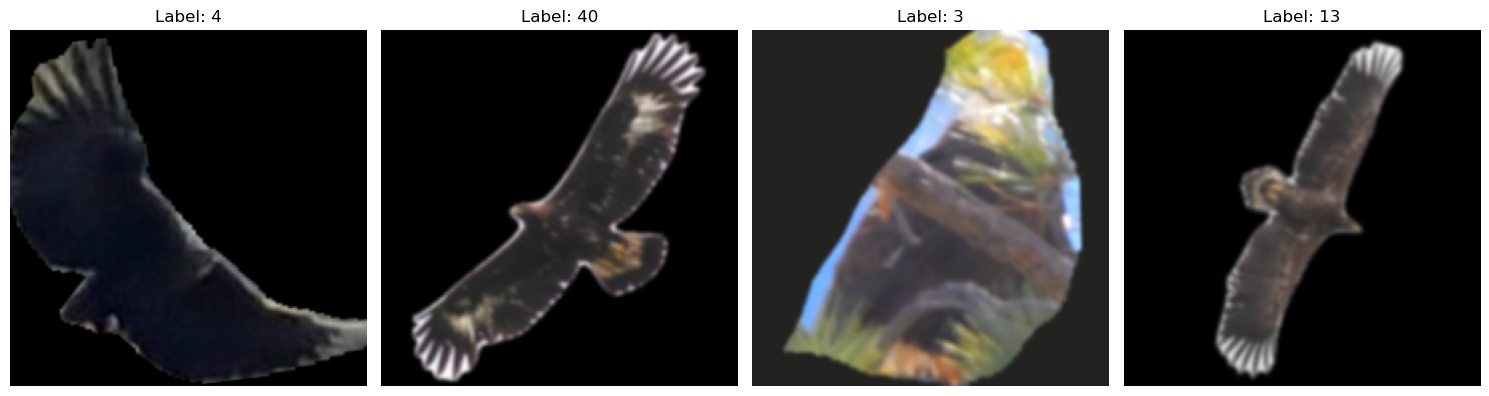

In [10]:

import matplotlib.pyplot as plt
import numpy as np
from data.transforms import denormalize

mean = [0.485, 0.456, 0.406] 
std = [0.229, 0.224, 0.225]

train_dataloader = data.train_dataloader()

# Fetch a batch of images (assuming batch size is 8 for example)
batch = next(iter(train_dataloader))
images,labels = batch
print("Batch Size:", images.size(0))
print("Image Shape:", images.shape)
print("Labels Shape:", labels.shape)

# Extract images and labels from the batch
images, labels = batch  # This assumes batch is structured as (images, labels)

# Plot the images
fig, axes = plt.subplots(1, 4, figsize=(15, 7))
axes = axes.flatten()

for i in range(4):  #  batch size 
    # image_np = unnormalize(images[i], mean, std).permute(1, 2, 0).numpy()  # [:3] selects RGB channels

    image_np = images[i].numpy()  # Convert from PyTorch tensor to numpy array
    image_np = denormalize(image_np, mean, std)  # Denormalize the image

    image_np = np.transpose(image_np, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C) for plotting
    label = labels[i].item()  # Convert label tensor to Python scalar using .item()
    ax = axes[i]
    ax.imshow(image_np)
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

preprocess lvl 3:

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \


Batch Size: 8
Image Shape: torch.Size([8, 4, 224, 224])
Labels Shape: torch.Size([8])


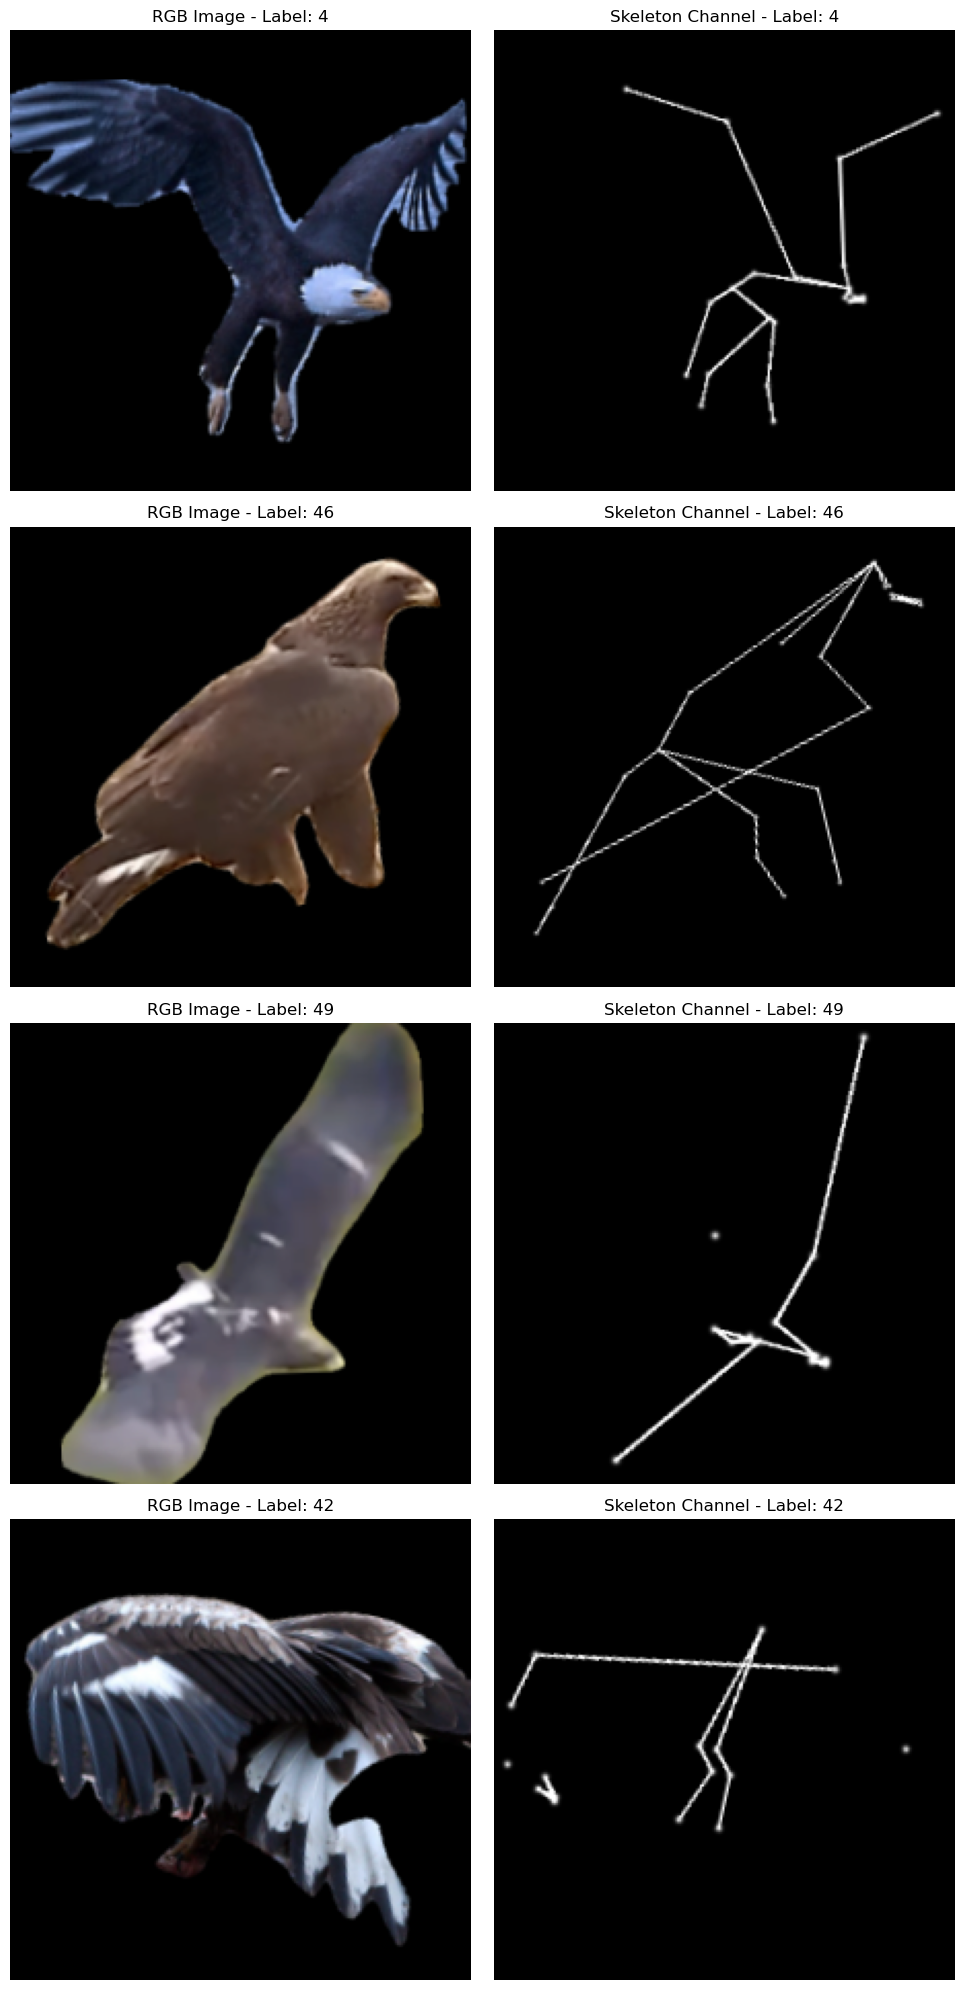

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from data.transforms import denormalize


# mean = [0.485, 0.456, 0.406] 
# std = [0.229, 0.224, 0.225]
# train_dataloader = data.train_dataloader()

batch = next(iter(train_dataloader))
images, labels = batch

print("Batch Size:", images.size(0))
print("Image Shape:", images.shape)
print("Labels Shape:", labels.shape)

# Plot the images and their skeletons side by side
fig, axes = plt.subplots(4, 2, figsize=(10, 20))  # 4 rows, 2 columns (RGB and skeleton for each image)
axes = axes.flatten()

for i in range(4):  # Assuming batch size is at least 4

    image_np = images[i].numpy()  # Convert from PyTorch tensor to numpy array
    image_np = denormalize(image_np, mean, std)  # Denormalize the First 3 channels (RGB)

    skeleton_image = images[i][3].cpu().numpy()  # 4th channel (Skeleton)

    image_np = np.transpose(image_np, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C) for plotting
    label = labels[i].item()  # Convert label tensor to Python scalar using .item()

    # Plot RGB image
    ax_rgb = axes[i * 2]
    ax_rgb.imshow(image_np)
    # ax_rgb.imshow(np.clip(image_np, 0, 1))  # Clip values to [0, 1] for valid image display
    ax_rgb.set_title(f'RGB Image - Label: {labels[i].item()}')
    ax_rgb.axis('off')

    # Plot Skeleton image (grayscale)
    ax_skel = axes[i * 2 + 1]
    ax_skel.imshow(skeleton_image, cmap='gray')  # Plot skeleton channel as a grayscale image
    ax_skel.set_title(f'Skeleton Channel - Label: {labels[i].item()}')
    ax_skel.axis('off')

plt.tight_layout()
plt.show()

preprocess lvl 4:

Batch Size: 4
Image Shape: torch.Size([4, 18, 224, 224])
Labels Shape: torch.Size([4])


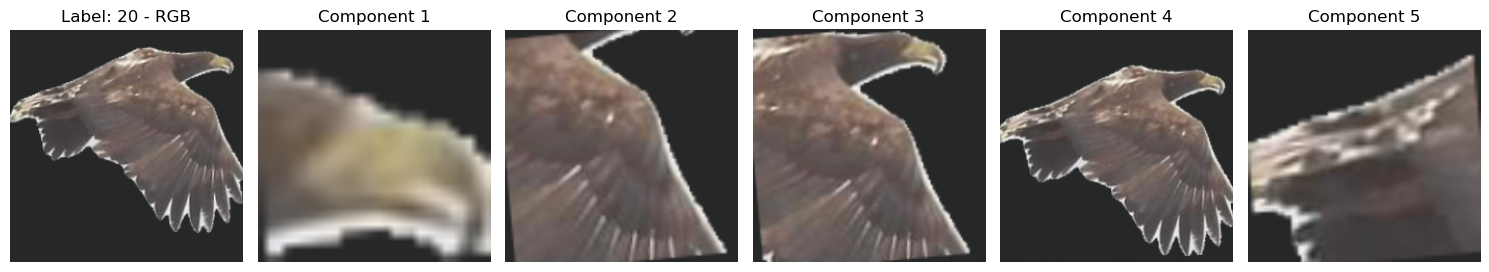

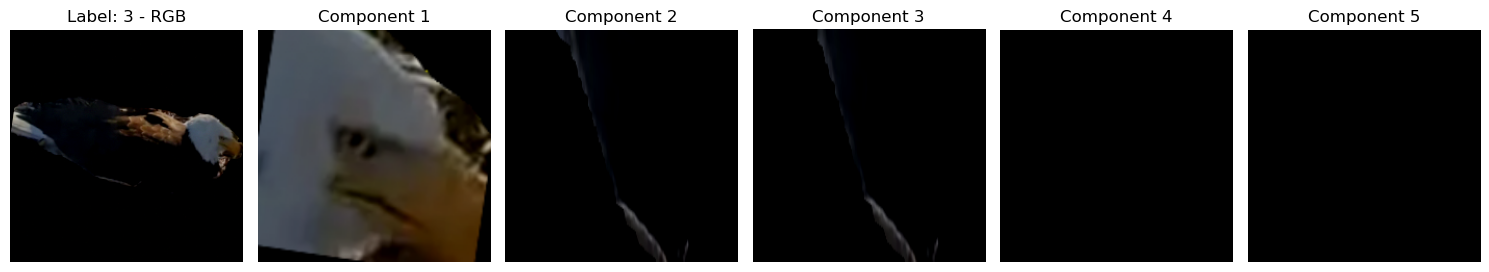

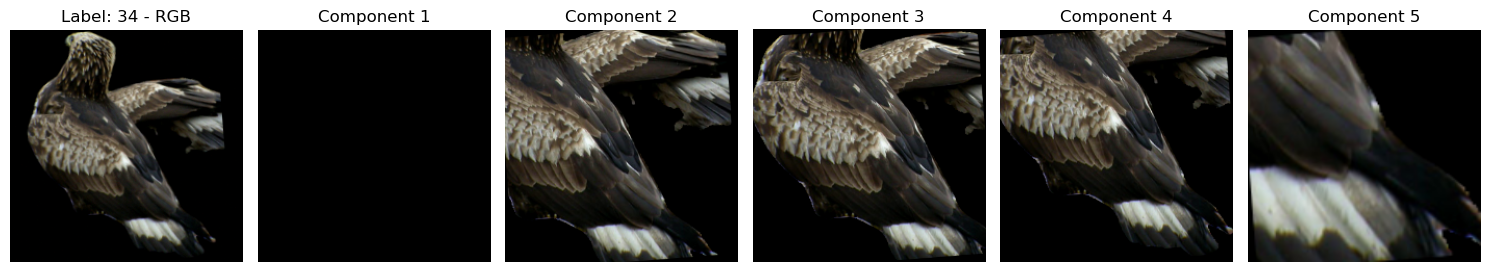

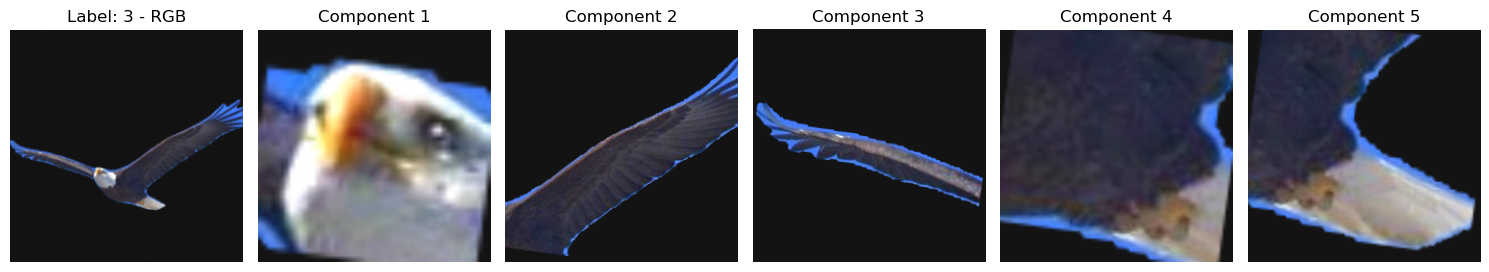

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from data.transforms import denorm_RGB_components

# Mean and standard deviation values to denormalize each RGB channel
mean = [0.485, 0.456, 0.406] 
std = [0.229, 0.224, 0.225]

train_dataloader = data.train_dataloader()

# Fetch a batch of images (assuming batch size is 8 for example)
batch = next(iter(train_dataloader))
images, labels = batch
print("Batch Size:", images.size(0))
print("Image Shape:", images.shape)  # Expected shape: (batch_size, channels, height, width)
print("Labels Shape:", labels.shape)

for i in range(images.size(0)):  # Loop through each image in the batch
    fig, axes = plt.subplots(1, 6, figsize=(15, 5))  # Create 2x3 grid for each image
    axes = axes.flatten()

    # Extract the full image with RGB + component channels
    full_image = images[i].numpy()  # Shape: (channels, height, width)

    # Denormalize the full image (including RGB and component channels)
    full_image_denorm = denorm_RGB_components(full_image, mean, std)

    # Plot RGB image (first 3 channels)
    rgb_image = full_image_denorm[:3]  # Extract the first 3 channels (RGB)
    rgb_image = np.transpose(rgb_image, (1, 2, 0))  # Convert to (H, W, C) for plotting
    
    ax = axes[0]
    ax.imshow(rgb_image.astype(np.uint8))  # Convert back to integer type for proper visualization
    ax.set_title(f'Label: {labels[i].item()} - RGB')
    ax.axis('off')

    # Plot component channels (next 5 sets of 3 channels each)
    for j in range(5):  # Assuming 5 components, each with 3 channels
        # Extract the next set of 3 channels for the current component
        component_channels = full_image_denorm[3 + (j * 3): 3 + (j * 3) + 3]  # Extract the component channels
        component_image = np.transpose(component_channels, (1, 2, 0))  # Convert to (H, W, C) for plotting

        ax = axes[j + 1]  # Move to the next subplot (j + 1 because axes[0] is used for RGB)
        ax.imshow(component_image.astype(np.uint8))  # Convert back to integer type for proper visualization
        ax.set_title(f'Component {j + 1}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()


preprocess lvl 5:

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \


Batch Size: 8
Image Shape: torch.Size([8, 26, 224, 224])
Labels Shape: torch.Size([8])


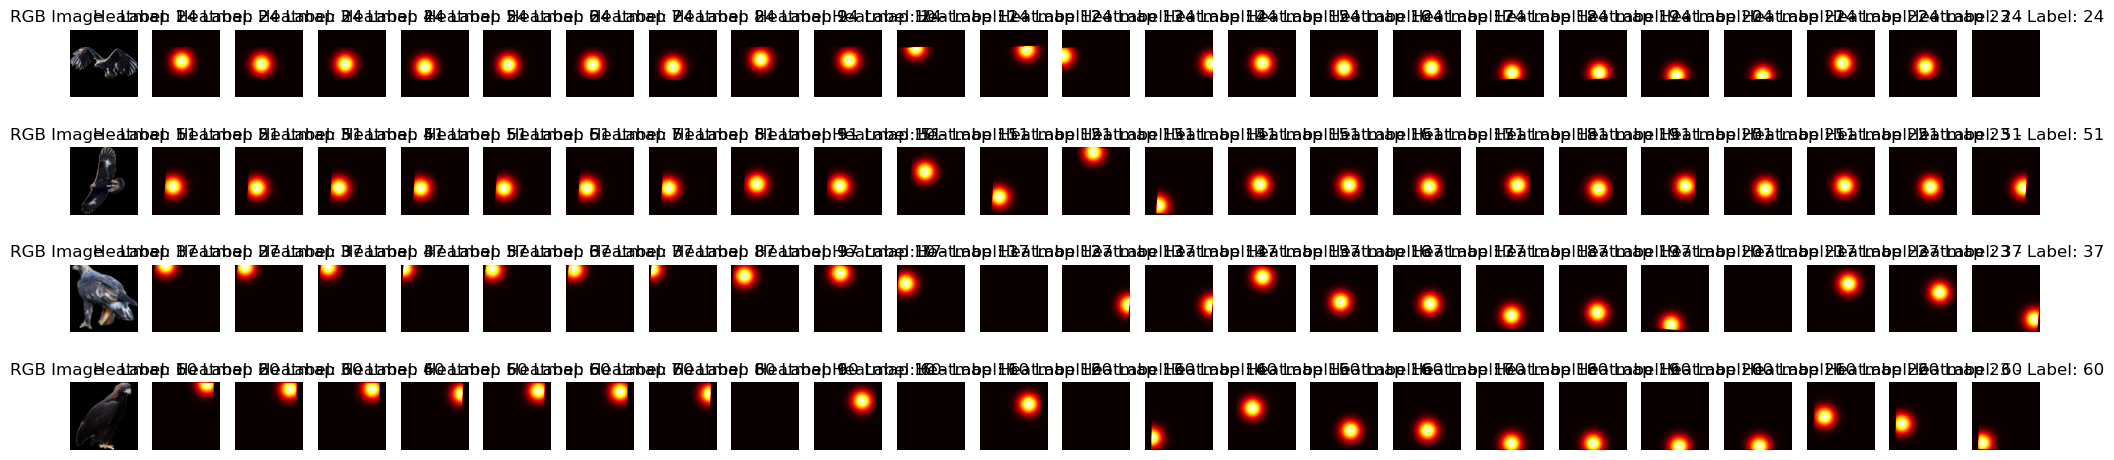

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from data.transforms import denormalize


mean = [0.485, 0.456, 0.406] 
std = [0.229, 0.224, 0.225]
train_dataloader = data.train_dataloader()

batch = next(iter(train_dataloader))
images, labels = batch

print("Batch Size:", images.size(0))
print("Image Shape:", images.shape)  # Should be [Batch, 3 + num_heatmaps, H, W]
print("Labels Shape:", labels.shape)

# Define the number of heatmaps (channels) after the RGB channels
num_heatmaps = images.shape[1] - 3  # Subtract RGB channels

# Plot the images and their heatmaps side by side
fig, axes = plt.subplots(4, num_heatmaps + 1, figsize=(20, 5))  # 4 rows, num_heatmaps + 1 columns
axes = axes.flatten()

for i in range(4):  # Assuming batch size is at least 4
    # Extract the RGB channels
    image_np = images[i][:3].numpy()  # Take first 3 channels (RGB)
    image_np = denormalize(image_np, mean, std)  # Denormalize the RGB channels
    image_np = np.transpose(image_np, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C) for plotting
    label = labels[i].item()  # Convert label tensor to Python scalar using .item()

    # Plot RGB image
    ax_rgb = axes[i * (num_heatmaps + 1)]
    ax_rgb.imshow(image_np)  # Remove clipping here, as image_np should be in [0, 1] range now
    ax_rgb.set_title(f'RGB Image - Label: {labels[i].item()}')
    ax_rgb.axis('off')

    # Plot each heatmap (grayscale)
    for j in range(num_heatmaps):
        heatmap = images[i][3 + j].cpu().numpy()  # Get the heatmap (after the 3 RGB channels)
        
        # Normalize the heatmap if necessary (if values are too small/large)
        if heatmap.max() > 0:
            heatmap = heatmap / heatmap.max()  # Normalize to [0, 1]

        # Plot the heatmap
        ax_heatmap = axes[i * (num_heatmaps + 1) + (j + 1)]
        ax_heatmap.imshow(heatmap, cmap='hot')  # Plot heatmap as a grayscale image
        ax_heatmap.set_title(f'Heatmap {j + 1} - Label: {labels[i].item()}')
        ax_heatmap.axis('off')

plt.tight_layout()
plt.show()



/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \


Batch Size: 8
Image Shape: torch.Size([8, 26, 224, 224])
Labels Shape: torch.Size([8])


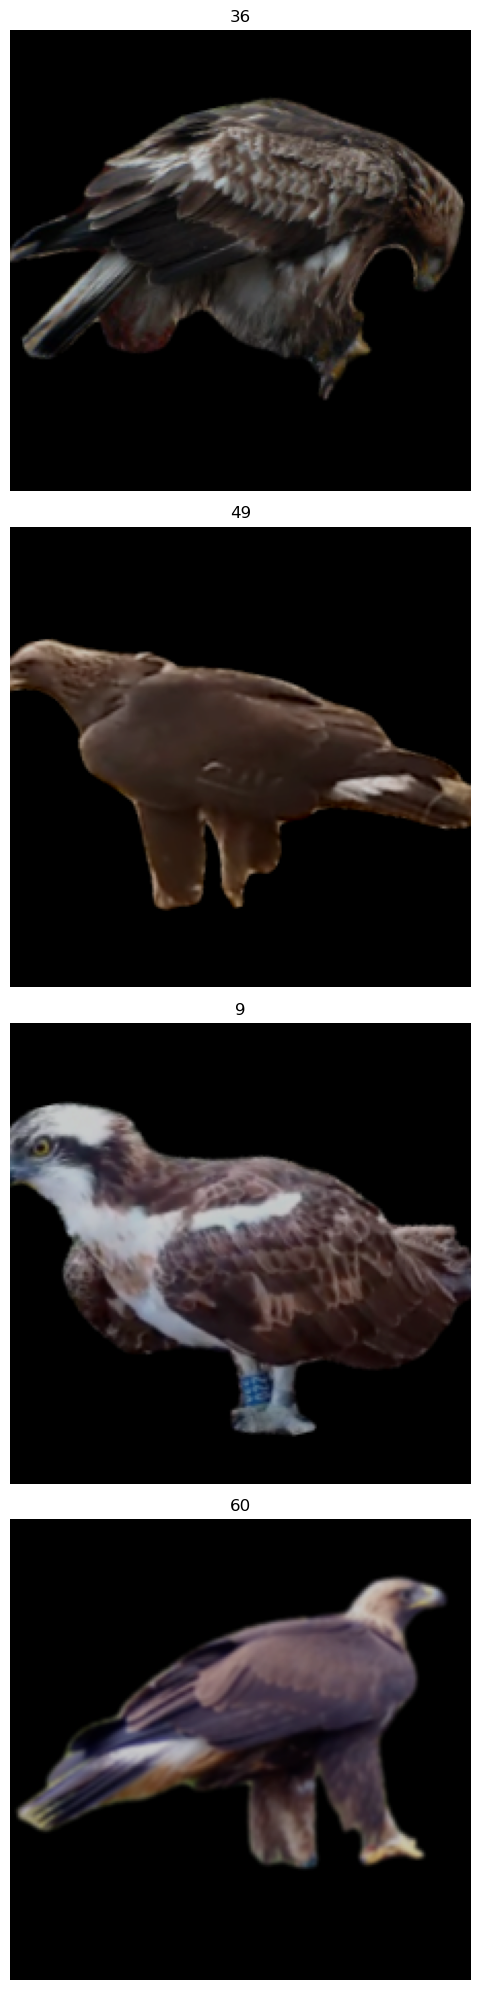

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from data.transforms import denormalize

# Assuming you already have your data loaded
batch = next(iter(train_dataloader))
images, labels = batch

print("Batch Size:", images.size(0))
print("Image Shape:", images.shape)  # Should be [Batch, 3 + num_heatmaps, H, W]
print("Labels Shape:", labels.shape)

# Define the number of heatmaps (channels) after the RGB channels
num_heatmaps = images.shape[1] - 3  # Subtract RGB channels

# Plot the images with overlapped heatmaps
fig, axes = plt.subplots(4, 1, figsize=(10, 20))  # 4 rows, 1 column (RGB + heatmaps overlay)
axes = axes.flatten()

for i in range(4):  # Assuming batch size is at least 4
    # Extract the RGB channels
    image_np = images[i][:3].numpy()  # Take first 3 channels (RGB)
    image_np = denormalize(image_np, mean, std)  # Denormalize the RGB channels
    image_np = np.transpose(image_np, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C) for plotting
    
    label = labels[i].item()  # Convert label tensor to Python scalar using .item()

    # Plot RGB image
    ax_rgb = axes[i]
    ax_rgb.imshow(image_np)  # Display RGB image
    ax_rgb.set_title(labels[i].item())
    ax_rgb.axis('off')

    # Overlay each heatmap on the RGB image with transparency (alpha)
    for j in range(num_heatmaps):
        heatmap = images[i][3 + j].cpu().numpy()  # Get the heatmap (after the 3 RGB channels)
        
        # Normalize the heatmap if necessary
        if heatmap.max() > 0:
            heatmap = heatmap / heatmap.max()  # Normalize to [0, 1]
        # Create a mask where the heatmap has non-zero values
        mask = heatmap > 0
        # Convert heatmap to RGB using a colormap
        heatmap_rgb = plt.cm.jet(heatmap)[:, :, :3]  # Use 'jet' colormap and discard alpha
        # Only overlay the heatmap where the mask is True
        image_np[mask] = image_np[mask] * 0.5 + heatmap_rgb[mask] * 0.5  # Blend
    ax_rgb.imshow(image_np, alpha=0.2)

plt.tight_layout()
plt.show()

#### Training

In [3]:
from pytorch_lightning import Trainer
# Create the LightningModule with Triplet Loss
model = TripletModel(backbone_model_name='resnet18', margin=0.2, mining_type='hard', re_ranking=True, preprocess_lvl=4)

# Train the model
trainer_args = {
        'max_epochs': 1,
        # 'callbacks': callbacks,
        'default_root_dir': 'logs',
        'accelerator': 'cpu',
        'devices': 1,
        # 'logger': wandb_logger,
        'deterministic': True,
    }
trainer = Trainer(**trainer_args)
trainer.fit(model, data)

# trainer.validate(model, dataloaders=data.val_dataloader())

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name     | Type               | Params | Mode 
--------------------------------------------------------
0 | backbone | ResNet          

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


using GPU to compute original distance
starting re_ranking


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Training: |          | 0/? [00:00<?, ?it/s]

Random mAP: 0.15789473684210525


Validation: |          | 0/? [00:00<?, ?it/s]

using GPU to compute original distance
starting re_ranking


`Trainer.fit` stopped: `max_epochs=1` reached.


### Inference

In [8]:
from utils.triplet_loss_utils import get_all_embeddings, get_all_embeddings_val
from pytorch_metric_learning.utils.inference import InferenceModel
from wildlife_tools.similarity.cosine import CosineSimilarity

# val_loader = data.val_dataloader()
query_loader, gallery_loader = data.val_dataloader()


# Initialize the feature extractor
extractor = InferenceModel(trunk=model.backbone, embedder=model.embedder)
# Extract features from query and database
# query_embeddings = get_all_embeddings_val(extractor, val_loader, query=True)
# gallery_embeddings = get_all_embeddings_val(extractor, val_loader, query=False)
query_embeddings = get_all_embeddings(extractor, query_loader)
gallery_embeddings = get_all_embeddings(extractor, gallery_loader)

similarity_function = CosineSimilarity()
similarity = similarity_function(query_embeddings, gallery_embeddings)['cosine']
print("Similarity matrix: \n", similarity.shape)

Similarity matrix: 
 (19, 93)


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/wildlife_tools/similarity/cosine.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a, b = torch.tensor(a), torch.tensor(b)


In [11]:
import timm
backbone = timm.create_model('hf-hub:BVRA/MegaDescriptor-T-224', num_classes=0, pretrained=True)
for name, param in backbone.named_parameters():
            print(f"{name}: requires_grad = {param.requires_grad}")

patch_embed.proj.weight: requires_grad = True
patch_embed.proj.bias: requires_grad = True
patch_embed.norm.weight: requires_grad = True
patch_embed.norm.bias: requires_grad = True
layers.0.blocks.0.norm1.weight: requires_grad = True
layers.0.blocks.0.norm1.bias: requires_grad = True
layers.0.blocks.0.attn.relative_position_bias_table: requires_grad = True
layers.0.blocks.0.attn.qkv.weight: requires_grad = True
layers.0.blocks.0.attn.qkv.bias: requires_grad = True
layers.0.blocks.0.attn.proj.weight: requires_grad = True
layers.0.blocks.0.attn.proj.bias: requires_grad = True
layers.0.blocks.0.norm2.weight: requires_grad = True
layers.0.blocks.0.norm2.bias: requires_grad = True
layers.0.blocks.0.mlp.fc1.weight: requires_grad = True
layers.0.blocks.0.mlp.fc1.bias: requires_grad = True
layers.0.blocks.0.mlp.fc2.weight: requires_grad = True
layers.0.blocks.0.mlp.fc2.bias: requires_grad = True
layers.0.blocks.1.norm1.weight: requires_grad = True
layers.0.blocks.1.norm1.bias: requires_grad = T

In [10]:
# ALTERNATE INFERENCE FROM WILDLIFE-TOOLS
from wildlife_tools.features import DeepFeatures
from wildlife_tools.similarity.cosine import CosineSimilarity
from utils.triplet_loss_utils import KnnClassifier
import numpy as np
import timm

query_loader, gallery_loader = data.val_dataloader()
gallery_dataset = gallery_loader.dataset
query_dataset = query_loader.dataset

backbone = timm.create_model('hf-hub:BVRA/MegaDescriptor-T-224', num_classes=0, pretrained=True)
extractor = DeepFeatures(backbone)
query, database = extractor(query_dataset), extractor(gallery_dataset)

print(f'Query features shape: {query.shape}, Database features shape: {database.shape}')
# Cosine similarity between deep features
similarity_function = CosineSimilarity()
similarity = similarity_function(query, database)['cosine']
print("Similarity matrix: \n", similarity.shape)

### Debug: Check indices and sizes
print(f"Database labels size: {len(gallery_dataset.labels_map)}")
print(f"Sample indices from similarity: {np.argmax(similarity, axis=1)[:10]}")

# Nearest neigbour classifier using the similarity
classifier = KnnClassifier(k=1, database_labels=gallery_dataset.labels)
preds = classifier(similarity)
preds = gallery_dataset.labels_map[preds]
print("Prediction \t", preds)
print("Ground truth \t", query_dataset.labels_string)

acc = sum(preds == query_dataset.labels_string) / len(query_dataset.labels_string)
print('\n Accuracy: ', acc)

  0%|                                                                         | 0/1 [00:00<?, ?it/s]

  0%|                                                                         | 0/1 [00:10<?, ?it/s]


RuntimeError: Given groups=1, weight of size [96, 3, 4, 4], expected input[19, 18, 224, 224] to have 3 channels, but got 18 channels instead

In [9]:
from utils.triplet_loss_utils import KnnClassifier

# gallery_dataset = val_loader.get_gallery_labels()
# query_dataset = val_loader.get_query_labels()
gallery_dataset = gallery_loader.dataset
query_dataset = query_loader.dataset

# Nearest neigbour classifier using the similarity
classifier = KnnClassifier(k=1, database_labels=gallery_dataset.labels)
preds = classifier(similarity)
preds = gallery_dataset.labels_map[preds]
print("Predictions \t", preds)
print("Ground truths \t", query_dataset.labels_string)

accuracy = np.mean(query_dataset.labels_string == preds)

print(f"Accuracy: {accuracy * 100:.4f}%")

19
112
Predictions 	 ['England_LS7' 'BigBear_jackie' 'Orrhult_511L' 'England_G274' 'Orrhult_511L' 'Orrhult_511N' 'England_G318' 'England_G801' 'SouthScotland_beakyC11' 'BigBear_jackie' 'Orrhult_511N' 'OrangeCounty_lai' 'SouthScotland_ellenaB46' 'SouthScotland_emily121' 'OrangeCounty_lai' 'England_G324' 'Orrhult_279G' 'BigBear_jackie'
 'SouthScotland_donaldF47']
Ground truths 	 ['BigBear_jackie' 'BigBear_shadow' 'Draper_kateri' 'England_CJ7' 'England_G274' 'England_G318' 'England_G324' 'England_G393' 'England_G463' 'NewJersey_duke' 'Orrhult_269K' 'Orrhult_279G' 'Orrhult_506H' 'Orrhult_511L' 'SouthScotland_beakyC11' 'SouthScotland_edwardC09' 'SouthScotland_emily121' 'SouthScotland_ionaC24'
 'SouthScotland_skanC17']


/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/triplet_loss_utils.py:146: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


NameError: name 'np' is not defined

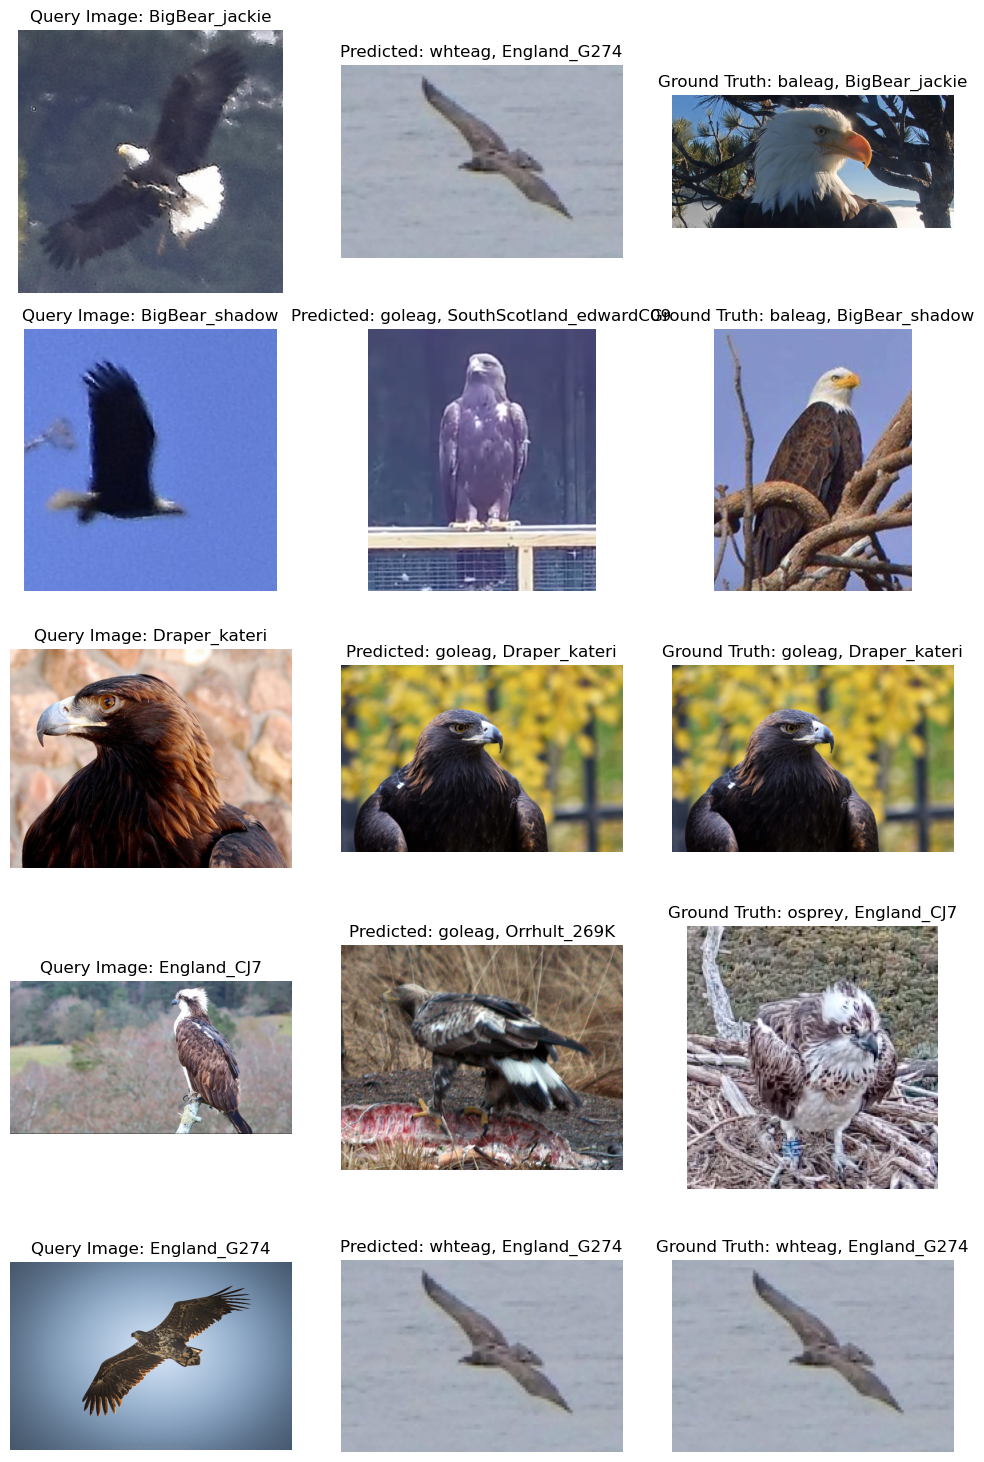

In [ ]:
from utils.visualization import query_prediction_results

query_prediction_results(root, query_dataset.metadata, gallery_dataset.metadata, 0, preds, num_images=5)

## Metrics

In [ ]:
import utils.metrics as metrics

# Use the distance matrix from the cosine similarity (convert to distances)
distmat = 1 - similarity  # Convert similarity to a distance metric